In [2]:
#import
import requests
import json
import pandas as pd

#url and data variable
url = 'https://w3qa5ydb4l.execute-api.eu-west-1.amazonaws.com/prod/finnishCoronaData/v2'
data = json.loads(requests.get(url).text)
# print(json.dumps(data, indent=1))

In [3]:
# normalizing the data
df = pd.json_normalize(data, 'confirmed')
df = df[['id','date','healthCareDistrict']]
df.head(2)

,id,date,healthCareDistrict
0,HUS_2020-01-28T15:00:00.000Z_1,2020-01-28T15:00:00.000Z,HUS
1,HUS_2020-02-10T15:00:00.000Z_1,2020-02-10T15:00:00.000Z,HUS


In [15]:
# datetime formatting and checking the date
df['date']= pd.to_datetime(df['date'])
#df['date'].dtypes
df.loc[0,'date'].day_name()

'Tuesday'

In [6]:
# every row in the data equals another case. Just added number
df['case'] = 1

In [7]:
# added what day of week it is
df['dayOfWeek'] = df['date'].dt.day_name()
df['dayOfWeek'].value_counts()

Monday       2274
Wednesday    2242
Tuesday      2223
Thursday     2163
Friday       1979
Sunday       1393
Saturday     1281
Name: dayOfWeek, dtype: int64

In [16]:
# making a resample for every day, summing up the number of cases per day
casePerDay = df.resample('D', on='date').sum()
casePerDay.head()

,case
date,
2020-01-28 00:00:00+00:00,1
2020-01-29 00:00:00+00:00,0
2020-01-30 00:00:00+00:00,0
2020-01-31 00:00:00+00:00,0
2020-02-01 00:00:00+00:00,0


In [9]:
casePerDayVaasa = df.loc[df['healthCareDistrict'] == 'Vaasa']

In [17]:
casePerDayVaasa

,id,date,healthCareDistrict,case,dayOfWeek
298,Vaasa_2020-03-14T15:00:00.000Z_1,2020-03-14 15:00:00+00:00,Vaasa,1,Saturday
359,Vaasa_2020-03-15T15:00:00.000Z_1,2020-03-15 15:00:00+00:00,Vaasa,1,Sunday
360,Vaasa_2020-03-15T15:00:00.000Z_2,2020-03-15 15:00:00+00:00,Vaasa,1,Sunday
408,Vaasa_2020-03-16T15:00:00.000Z_1,2020-03-16 15:00:00+00:00,Vaasa,1,Monday
409,Vaasa_2020-03-16T15:00:00.000Z_2,2020-03-16 15:00:00+00:00,Vaasa,1,Monday
...,...,...,...,...,...
13311,Vaasa_2020-10-15T15:00:00.000Z_4,2020-10-15 15:00:00+00:00,Vaasa,1,Thursday
13449,Vaasa_2020-10-16T15:00:00.000Z_1,2020-10-16 15:00:00+00:00,Vaasa,1,Friday
13450,Vaasa_2020-10-16T15:00:00.000Z_2,2020-10-16 15:00:00+00:00,Vaasa,1,Friday
13451,Vaasa_2020-10-16T15:00:00.000Z_3,2020-10-16 15:00:00+00:00,Vaasa,1,Friday


In [18]:
# casesperday for Vaasa

casePerDayVaasa = casePerDayVaasa.resample('D', on='date').sum()
casePerDayVaasa

,case
date,
2020-03-14 00:00:00+00:00,1
2020-03-15 00:00:00+00:00,2
2020-03-16 00:00:00+00:00,3
2020-03-17 00:00:00+00:00,4
2020-03-18 00:00:00+00:00,3
...,...
2020-10-14 00:00:00+00:00,8
2020-10-15 00:00:00+00:00,4
2020-10-16 00:00:00+00:00,3


In [9]:
# matplotlib for jupyter
%matplotlib inline

In [10]:
# set date as index
df = df.set_index('date')
# casePerDay = df.resample('D').sum()

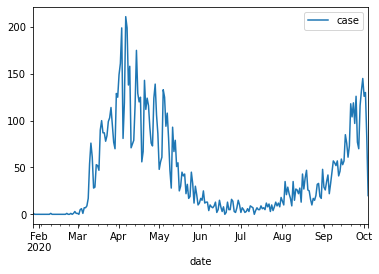

In [11]:
# graph per day all time
casePerDay.plot()

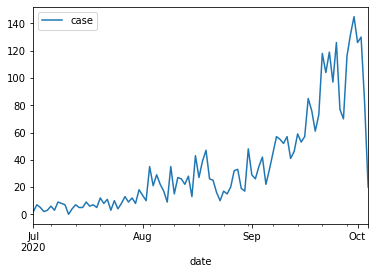

In [12]:
# lineplot of July and August
casePerDay.loc['2020-07':'2020-10'].plot()

last data date: 
2020-10-18 00:00:00+00:00
# of cases last date: 
28


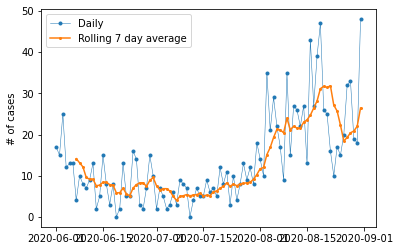

In [21]:
#lineplot and rolling 7 day average
import matplotlib.pyplot as plt
# Start and end of the date range to extract
start, end = '2020-06', '2020-08'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(casePerDay.loc[start:end, 'case'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(casePerDay.loc[start:end, 'case'].rolling(window=7).mean(),
marker='o', markersize=2, linestyle='-', label='Rolling 7 day average')
ax.set_ylabel('# of cases')
ax.legend();
print('last data date: ')  
print(casePerDay.index.max())
print('# of cases last date: ')  
print(casePerDay['case'].loc[casePerDay.index.max()])

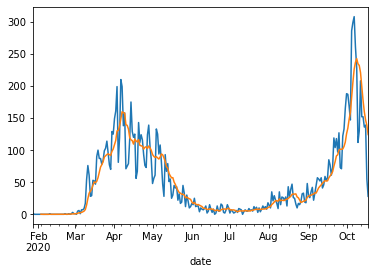

In [19]:
# just a simple way of writing the plot
start, end = '2020-04', '2020-08'
casePerDay['case'].plot()
casePerDay['case'].rolling(window=7).mean().plot()

last data date: 
2020-09-28 00:00:00+00:00
# of cases last date: 
2


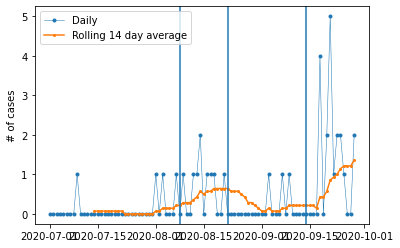

In [64]:
#lineplot and rolling 7 day average
import matplotlib.pyplot as plt
import numpy 
import datetime as dt
# Start and end of the date range to extract
start, end = '2020-07', '2020-10'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(casePerDayVaasa.loc[start:end, 'case'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(casePerDayVaasa.loc[start:end, 'case'].rolling(window=14).mean(),
marker='o', markersize=2, linestyle='-', label='Rolling 14 day average')
#Vaasa festival
plt.axvline(dt.datetime(2020, 8, 8))
plt.axvline(dt.datetime(2020, 8, 22))
#School start
plt.axvline(dt.datetime(2020, 9, 14))
ax.set_ylabel('# of cases')
ax.legend();
print('last data date: ')  
print(casePerDayVaasa.index.max())
print('# of cases last date: ')  
print(casePerDayVaasa['case'].loc[casePerDayVaasa.index.max()])

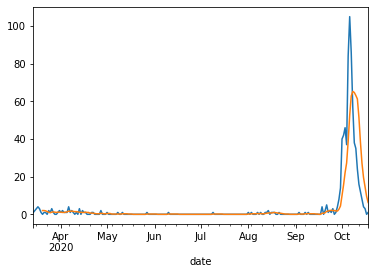

In [22]:
# just a simple way of writing the plot
start, end = '2020-04', '2020-10'
casePerDayVaasa['case'].plot()
casePerDayVaasa['case'].rolling(window=7).mean().plot()